# **Week 1: Project Kick-off and Data Collection**


## Objectives
*   Data Collection
*   Data Preprocessing
*   Exploratory Data Analysis (EDA)







## Importing Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **1. Data Collection and Initial Preprocessing**

Load Dtasets

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the datasets
train_path = '/content/drive/My Drive/Datasets/Train.csv'
test_path = '/content/drive/My Drive/Datasets/Test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [ ]:
train_df.shape

(31647, 18)

In [ ]:
test_df.shape

(13564, 17)

## Basic Info

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [ ]:
train_df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
test_df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
count,13294.000000,13383.000000,13564.000000,13442.000000,13519.000000,2441.000000,13564.000000
mean,40.450429,1341.405514,15.778089,261.171031,2.730971,223.582958,0.553966
std,10.747881,2839.670990,8.321562,261.195560,2.941338,116.196526,1.762402
min,18.000000,-6849.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,32.000000,70.500000,8.000000,102.000000,1.000000,131.000000,0.000000
50%,39.000000,447.000000,16.000000,182.000000,2.000000,194.000000,0.000000
75%,48.000000,1466.000000,21.000000,325.000000,3.000000,323.000000,0.000000
max,94.000000,71187.000000,31.000000,3863.000000,50.000000,842.000000,38.000000


In [ ]:
test_df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome'],
      dtype='object')

In [ ]:
train_df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [ ]:
# Separate features and target variable from training data
X_train = train_df.drop(['id', 'term_deposit_subscribed'], axis=1)
y_train = train_df['term_deposit_subscribed']

In [ ]:
# Separate features from test data
X_test = test_df.drop(['id'], axis=1)

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [ ]:
# Display number of missing values before handling
print("Missing values in training data (Before Handling):")
print(X_train.isnull().sum())

Missing values in training data (Before Handling):
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64


In [ ]:
print("Missing values in test data (Before Handling):")
print(X_test.isnull().sum())

Missing values in test data (Before Handling):
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64


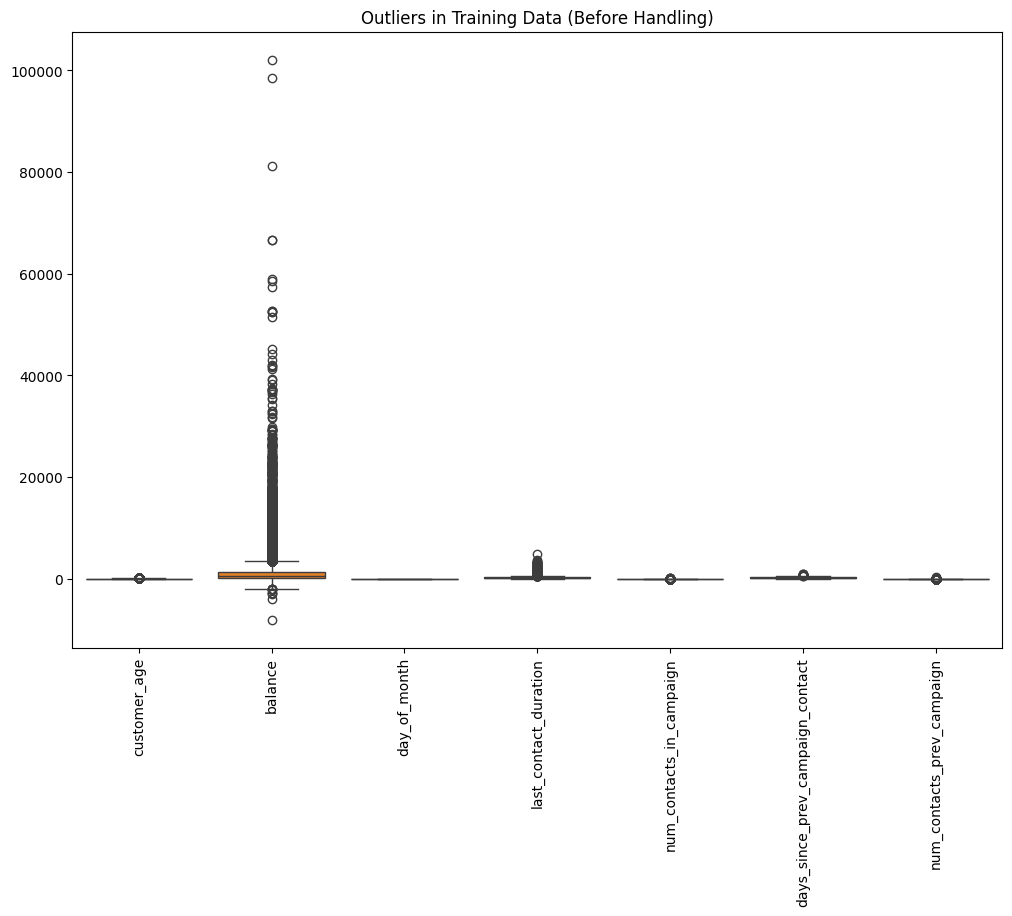

In [ ]:
# Plot outliers before handling
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train[numerical_cols])
plt.title('Outliers in Training Data (Before Handling)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Outlier Handling for numerical columns using IQR
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

X_train = handle_outliers(X_train, numerical_cols)
X_test = handle_outliers(X_test, numerical_cols)

In [ ]:
# Impute missing values in numerical columns with mean
for col in numerical_cols:
    X_train[col].fillna(X_train[col].mean(), inplace=True)
    X_test[col].fillna(X_train[col].mean(), inplace=True)

In [ ]:
# Impute missing values in categorical columns with mode
for col in categorical_cols:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)
    X_test[col].fillna(X_train[col].mode()[0], inplace=True)

In [ ]:
# Display number of missing values after handling
print("Missing values in training data (After Handling):")
print(X_train.isnull().sum())

Missing values in training data (After Handling):
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64


In [ ]:
print("Missing values in test data (After Handling):")
print(X_test.isnull().sum())

Missing values in test data (After Handling):
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64


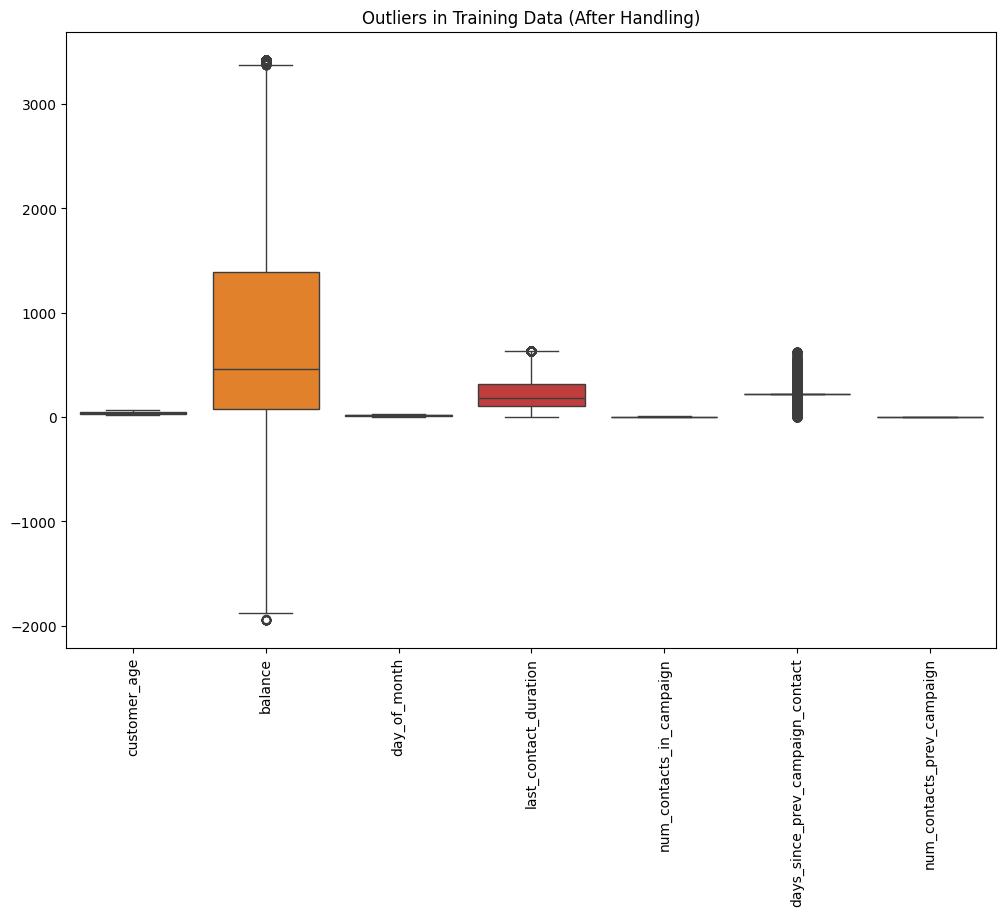

In [ ]:
# Plot outliers after handling
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train[numerical_cols])
plt.title('Outliers in Training Data (After Handling)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
# Apply OneHotEncoder to categorical columns in training data
encoded_categorical_cols_train = onehot_encoder.fit_transform(X_train[categorical_cols])


In [ ]:
# Create a DataFrame with the encoded columns
encoded_categorical_df_train = pd.DataFrame(encoded_categorical_cols_train, columns=onehot_encoder.get_feature_names_out(categorical_cols))

In [ ]:
# Drop original categorical columns and concatenate the encoded columns in training data
X_train_onehot = X_train.drop(categorical_cols, axis=1).reset_index(drop=True)
X_train_onehot = pd.concat([X_train_onehot, encoded_categorical_df_train], axis=1)

In [ ]:
# Apply OneHotEncoder to categorical columns in test data
encoded_categorical_cols_test = onehot_encoder.transform(X_test[categorical_cols])

In [ ]:
# Create a DataFrame with the encoded columns
encoded_categorical_df_test = pd.DataFrame(encoded_categorical_cols_test, columns=onehot_encoder.get_feature_names_out(categorical_cols))

In [ ]:
# Drop original categorical columns and concatenate the encoded columns in test data
X_test_onehot = X_test.drop(categorical_cols, axis=1).reset_index(drop=True)
X_test_onehot = pd.concat([X_test_onehot, encoded_categorical_df_test], axis=1)


## 2. Exploratory Data Analysis (EDA)

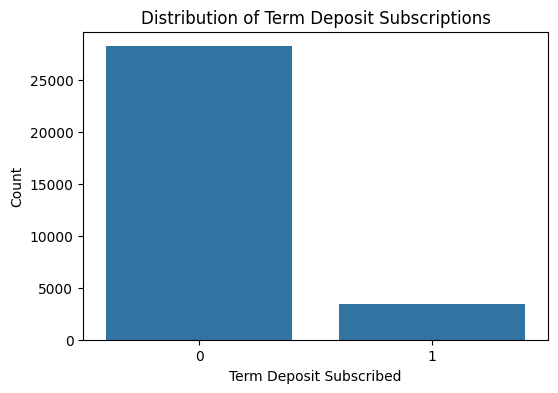

In [ ]:
# Plot distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Distribution of Term Deposit Subscriptions')
plt.xlabel('Term Deposit Subscribed')
plt.ylabel('Count')
plt.show()

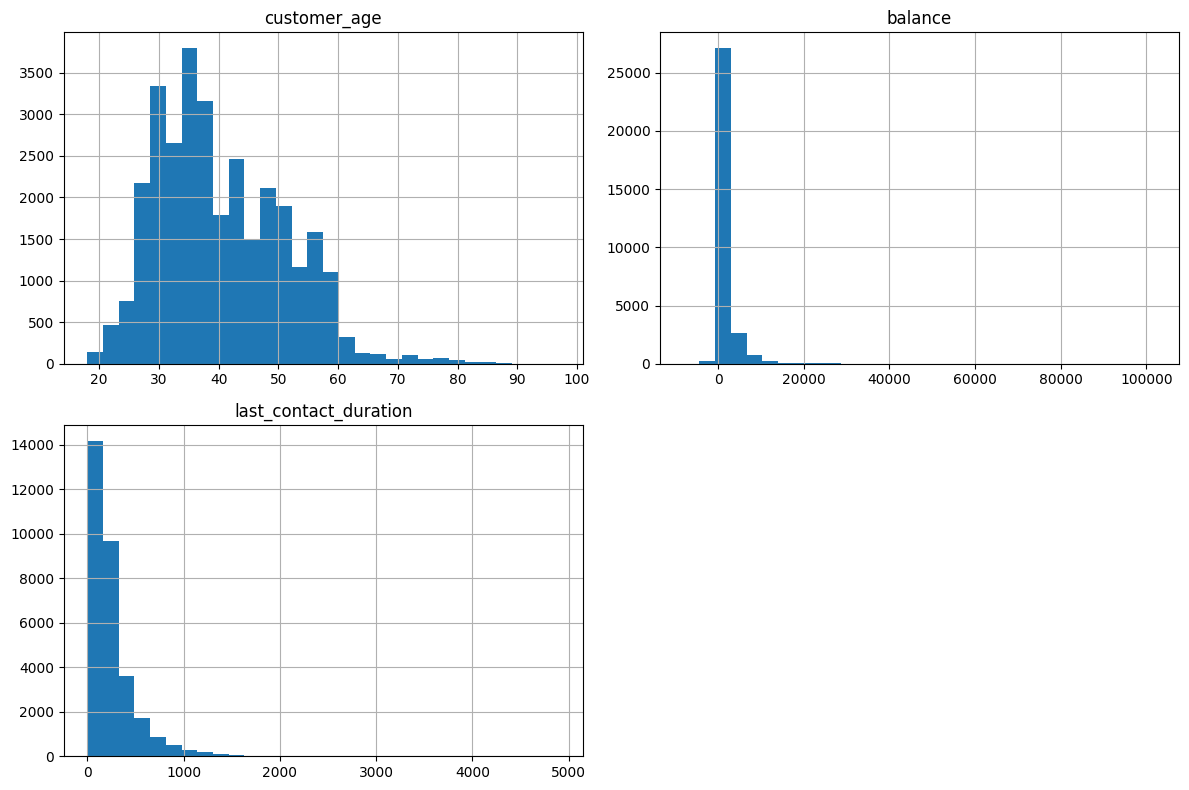

In [ ]:
# Plot distributions of numerical features
num_features = ['customer_age', 'balance', 'last_contact_duration']
train_df[num_features].hist(figsize=(12, 8), bins=30, layout=(2, 2))
plt.tight_layout()
plt.show()

Insights from EDA:

The target variable 'term_deposit_subscribed' is imbalanced, indicating that fewer customers subscribe to term deposits.
Distributions of numerical features reveal potential outliers and skewness that may need further handling.

# **Week 2: Clustering Algorithm Selection and Data Transformation**

# 3. Feature Selection and Data Scaling

In [ ]:
X_train_onehot.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,28.0,285.0,26,303.0,4.0,224.33425,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,34.0,934.0,18,143.0,2.0,132.00000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,46.0,656.0,5,101.0,4.0,224.33425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,34.0,2.0,20,127.0,3.0,224.33425,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,41.0,1352.0,13,49.0,2.0,224.33425,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test_onehot.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,55.0,3559.25,13,90.0,2.0,224.33425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24.0,179.00,18,63.0,2.0,224.33425,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,46.0,143.00,8,208.0,1.0,224.33425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,56.0,3559.25,6,34.0,1.0,224.33425,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,62.0,2913.00,12,127.0,1.0,188.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Feature Selection
X_train_selected = X_train_onehot.copy()
X_test_selected = X_test_onehot.copy()

In [ ]:
X_train_selected.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,28.0,285.0,26,303.0,4.0,224.33425,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,34.0,934.0,18,143.0,2.0,132.00000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,46.0,656.0,5,101.0,4.0,224.33425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,34.0,2.0,20,127.0,3.0,224.33425,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,41.0,1352.0,13,49.0,2.0,224.33425,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test_selected.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,55.0,3559.25,13,90.0,2.0,224.33425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24.0,179.00,18,63.0,2.0,224.33425,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,46.0,143.00,8,208.0,1.0,224.33425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,56.0,3559.25,6,34.0,1.0,224.33425,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,62.0,2913.00,12,127.0,1.0,188.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# 4. Algorithm Selection: Finding the Optimal Number of Clusters

# Using the Elbow Method

In [ ]:
# Elbow Method to find the optimal number of clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

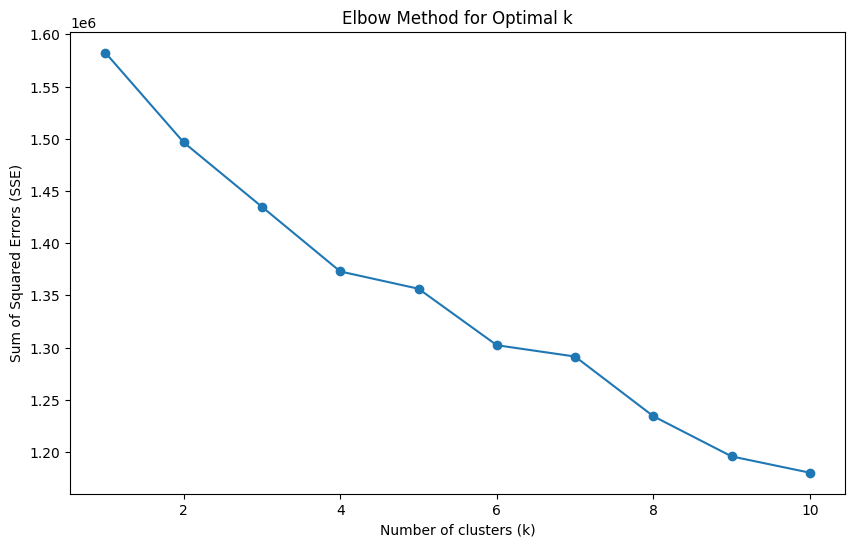

In [ ]:
# Plotting the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


# Using the Silhouette Score

In [ ]:
# Silhouette Scores to find the optimal number of clusters
silhouette_scores = []
for k in k_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

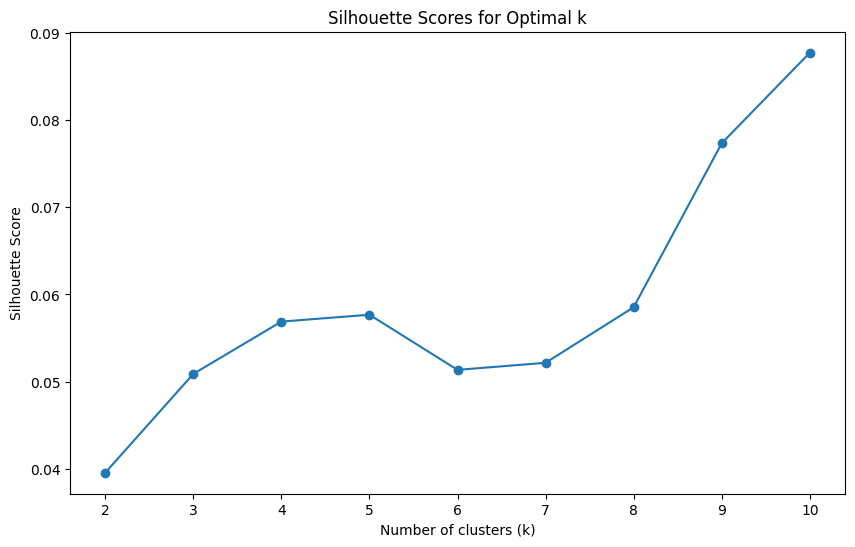

In [ ]:
# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Choose the optimal number of clusters (k) based on the above methods
optimal_k = 4  # Replace with the best k based on your plots
kmeans = KMeans(n_clusters=optimal_k, random_state=0)

Insights from Clustering Algorithm Selection:

The Elbow Method plot suggests that an optimal number of clusters could be where the curve starts to bend (the "elbow point").

The Silhouette Score plot provides additional insights on cluster validity, with higher scores indicating better-defined clusters.

Based on the analysis, the optimal number of clusters is chosen as 4 (subject to adjustment based on further analysis).

# 5. Dimensionality Reduction (Optional)

In [ ]:
# Dimensionality Reduction (Optional)
pca = PCA(n_components=10)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)